##### LIBRARIES

In [1]:
import pandas as pd

import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from collections import Counter

import seaborn as sns
import os# WordCloud ```positive``` reviews (spanish)##### LIBRARIES

##### SET

In [2]:
# Matplotlib inline to visualize Matplotlib graphs
%matplotlib inline
%config Inlinebackend.figure_format= 'retina'


# Configuration to set so that all the Seaborn figs come out with this size
sns.set_context("poster")
sns.set(rc={"figure.figsize": (12.,6.)})
sns.set_style("whitegrid")

##### DF

In [3]:
df = pd.read_csv('../data/prisma_def.csv')

# WordCloud ```positive``` reviews (spanish)

In [4]:
def wordcloud_pos_sp (df):
    # Concatenate pos_reviews into a single string
    reviews = ' '.join(df['pos_review'].dropna().values.tolist())
    # Stopwords to exclude
    stopwords = ['y', 'todo', 'la', 'que', 'con', 'de', 'no', 'dos', 'del', 'e', 'un', 'en', 'por', 'estaba', 'las', 'su', 'lo', 'son', 'tenía','más', 'el', 'sobre', 'los', 'me', 'es', 'para', 'a', 'muy', 'está', 'era', 'fue', 'como', 'nos', 'al', 'pero', 'también', 'tiene', 'general', 'una', 'habitación']
    # WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=20, colormap='viridis').generate(reviews)
    # Plot sets
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # Save
    #plt.savefig('../figures/wordcloud_pos_sp.png', dpi=300)
    plt.show()


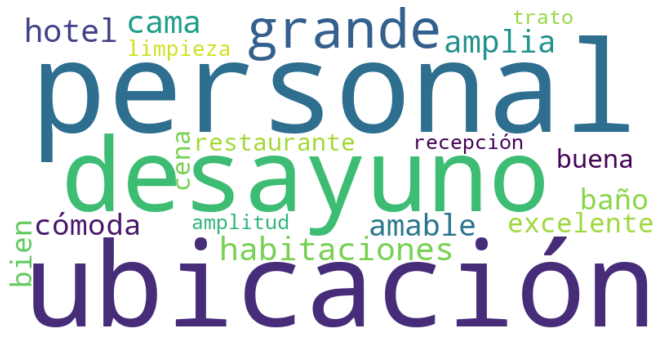

In [5]:
wordcloud_pos_sp (df)

# WordCloud ```negative``` reviews (spanish)

In [6]:
def wordcloud_neg_sp (df):
    # Concatenate neg_reviews into a single string
    reviews = ' '.join(df['neg_review'].dropna().values.tolist())
    # Stopwords to exclude
    stopwords = ['y', 'todo', 'la', 'que', 'con', 'de', 'no', 'dos', 'del', 'e', 'un', 'en', 'por', 'estaba', 'las', 'su', 'lo', 'son', 'tenía','más', 'el', 'sobre', 'los', 'me', 'es', 'para', 'a', 'muy', 'está', 'era', 'fue', 'como', 'nos', 'al', 'pero', 'también', 'tiene', 'general', 'nada', 'mal', 'poder', 'le', 'aunque', 'algo', 'ya', 'día', 'ni', 'poco', 'una', 'uno', 'si', 'estaban', 'porque', 'había', 'solo', 'sin', 'funcionaba', 'decir', 'falta', 'tuvimos', 'te', 'hace', 'bastante', 'estado', 'ser', 'ma', 'están', 'o', 'mucho', 'todos', 'hay', 'más', 'poca', 'ver', 'mas', 'se', 'habitación']
    # WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stopwords, max_words=20, colormap='magma').generate(reviews)
    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # Save
    #plt.savefig('../figures/wordcloud_neg_sp.png', dpi=300)
    plt.show()

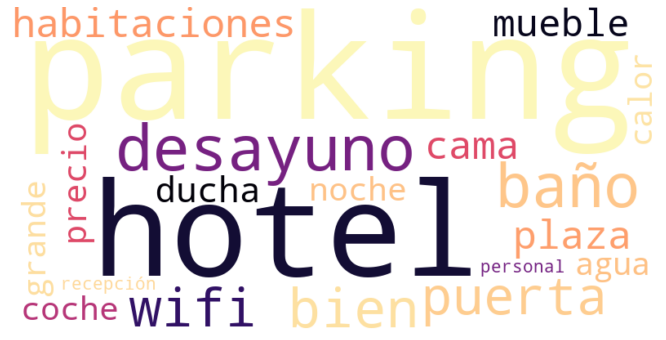

In [7]:
wordcloud_neg_sp (df)

# WordCloud ```positive``` reviews (english)

In [8]:
def wordcloud_pos_en (df):
    # Concatenate pos_reviews into a single string
    reviews = ' '.join(df['pos_review_en'].dropna().values.tolist())

    # Stopwords to exclude
    stopwords = ['the', 'in', 'of', 'it', 'and', 'i', 'all', 'was', 'is', 'very', 'for', 'to', 'at', 'that', 'with', 'everything', 'we', 'good', 'two', 'well', 'they', 'a']

    # WordCloud
    wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, max_words=15, colormap='viridis').generate(reviews)

    # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # Save
    #plt.savefig('../figures/wordcloud_pos_en.png', dpi=300)
    plt.show()

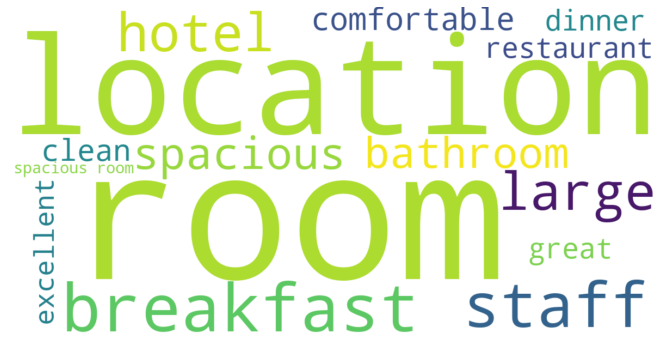

In [9]:
wordcloud_pos_en (df)

# WordCloud ```negative``` reviews (english)

In [10]:
def wordcloud_neg_en (df): 
    # Concatenate neg_reviews into a single string
    reviews = ' '.join(df['neg_review_en'].dropna().values.tolist())
    # Stopwords
    stopwords = ['the', 'in', 'of', 'it', 'and', 'i', 'all', 'was', 'is', 'very', 'for', 'to', 'at', 'that', 'with', 'everything', 'we', 'good', 'two','well', 'they', 'a', 'on', 'be', 'are', 'no', 'be', 'had', 'were', 'bit', 'have', 'nothing', 'did', 'not', 'but', 'you', 'there', 'if', 'would']
    # WordCloud
    wordcloud = WordCloud(width=1200, height=600, background_color='white', stopwords=stopwords, max_words=15, colormap='magma').generate(reviews)
     # Plot
    plt.figure(figsize=(12, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    # Save
    #plt.savefig('../figures/wordcloud_neg_en.png', dpi=300)
    plt.show()

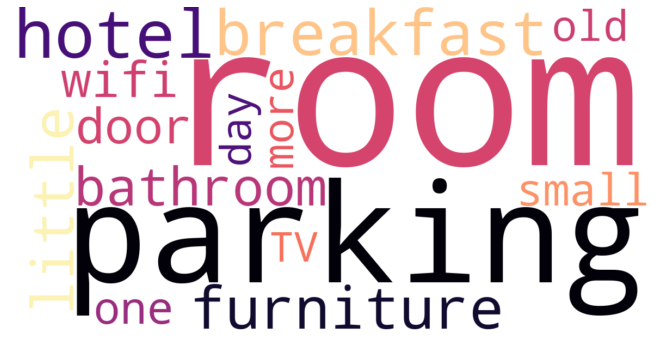

In [11]:
wordcloud_neg_en (df) 

# Top 10 Words in ```positive``` reviews

In [12]:
 def top_10_positive_words(df):
    nltk.download('stopwords')

    # Get pos_reviews
    reviews = df['pos_review_en'].dropna().values.tolist()
    text = ' '.join(reviews)
    tokens = word_tokenize(text)

    # Get the English Stopwords and specific stopwords
    stopwords_set = set(stopwords.words('english'))
    stopwords_set.add("good")

    # Filter the words that are not stopwords and have at least 3 characters
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_set and len(word) > 2]

    # Frequency
    word_freq = Counter(filtered_tokens)

    # Top 10
    top_10_words_pos = word_freq.most_common(10)

    # Extract the words and frequencies for plotting
    words, frequencies = zip(*top_10_words_pos)

    # Plot
    colors = ['#FF6B8E', '#FF9C5B', '#FFD87D', '#FFF076', '#B8E986', '#82C993', '#5AB9C4', '#7C6FBC', '#D1C6E1', '#FF91B6']
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color=colors)
    for i, (word, freq) in enumerate(top_10_words_pos):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
        
    # Labels
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Words in positive reviews')
    plt.xticks(rotation=45)
    
    # Save    
    #plt.savefig('../figures/top_10_pos.png', dpi=300)
    plt.show()
    #os.system('../figures/top_10_pos.png')

[nltk_data] Downloading package stopwords to /Users/begui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


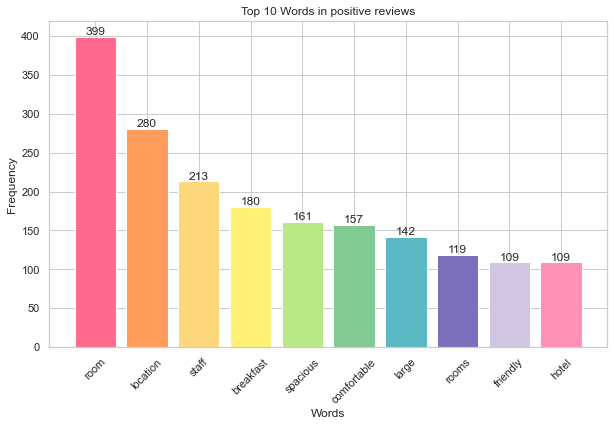

In [13]:
top_10_positive_words(df)

# Top 10 Words in ```negative``` reviews

In [14]:
def top_10_negative_words(df):
    nltk.download('stopwords')

    # Get neg_reviews
    reviews = df['neg_review_en'].dropna().values.tolist()
    text = ' '.join(reviews)
    tokens = word_tokenize(text)

    # Get the English Stopwords and specific stopwords
    stopwords_set = set(stopwords.words('english'))
    stopwords_set.add("n't")
    stopwords_set.add("nothing")
    stopwords_set.add("bit")

    # Filter the words that are not stopwords, "n't", and have at least 3 characters
    filtered_tokens = [word.lower() for word in tokens if word.lower() not in stopwords_set and len(word) > 2]

    # Frequency
    word_freq = Counter(filtered_tokens)

    # Top 10
    top_10_words_pos = word_freq.most_common(10)

    # Extract the words and frequencies for plotting
    words, frequencies = zip(*top_10_words_pos)

    # Plot
    colors = ['#FF6B8E', '#FF9C5B', '#FFD87D', '#FFF076', '#B8E986', '#82C993', '#5AB9C4', '#7C6FBC', '#D1C6E1', '#FF91B6']
    plt.figure(figsize=(10, 6))
    plt.bar(words, frequencies, color=colors)
    for i, (word, freq) in enumerate(top_10_words_pos):
        plt.text(i, freq, str(freq), ha='center', va='bottom')
        
    # Labels
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title('Top 10 Words in negative reviews')
    plt.xticks(rotation=45)
    
    # Save
    #plt.savefig('../figures/top_10_neg.png', dpi=300)
    
    plt.show()
    #os.system('../figures/top_10_pos.png')

[nltk_data] Downloading package stopwords to /Users/begui/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


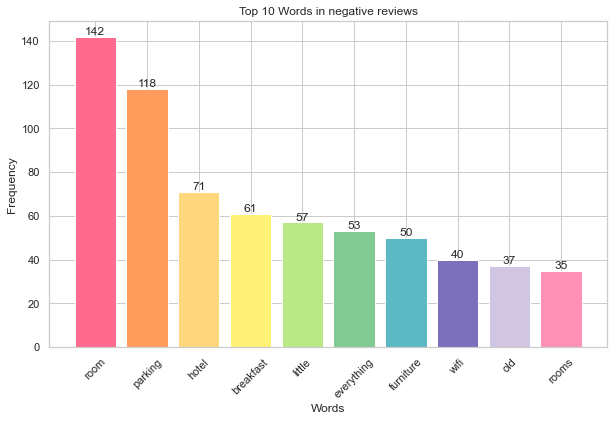

In [15]:
top_10_negative_words(df)